In [1]:
%pip install opencv-contrib-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('test_image.jpg')
cv2.imshow('result', image)
cv2.waitKey(0)

-1

In [4]:
lane_image = np.copy(image)
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
cv2.imshow('result', gray)
cv2.waitKey(0)

-1

In [5]:
blur = cv2.GaussianBlur(gray, (5,5),0)
cv2.imshow('result', blur)
cv2.waitKey(0)

-1

In [6]:
canny = cv2.Canny(blur, 50, 150)
cv2.imshow('result', canny)
cv2.waitKey(0)

-1

In [7]:
def canny(image):
    lane_image = np.copy(image)
    gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5),0)
    return cv2.Canny(blur, 50, 150)

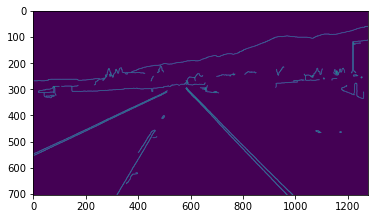

In [8]:
canny_image = canny(image)
plt.imshow(canny_image)

In [9]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    return mask, mask & image

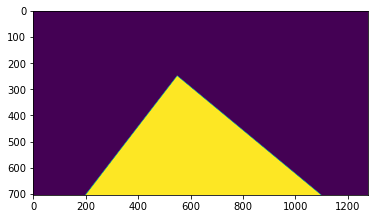

In [10]:
mask, cropped_image = region_of_interest(canny_image)
plt.imshow(mask)

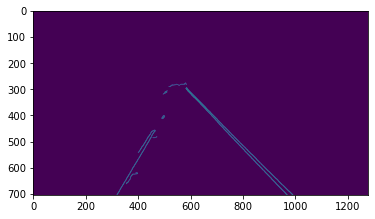

In [11]:
plt.imshow(cropped_image)

In [12]:
lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), minLineLength = 40, maxLineGap = 5)
lines

array([[[704, 418, 927, 641]],

       [[704, 426, 791, 516]],

       [[320, 703, 445, 494]],

       [[585, 301, 663, 381]],

       [[630, 341, 670, 383]],

       [[794, 520, 861, 591]],

       [[659, 371, 704, 416]],

       [[870, 599, 939, 672]],

       [[767, 493, 807, 534]],

       [[423, 509, 454, 461]],

       [[940, 653, 991, 702]],

       [[824, 551, 879, 609]],

       [[676, 389, 754, 467]]], dtype=int32)

In [13]:
def display_lines(image,lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

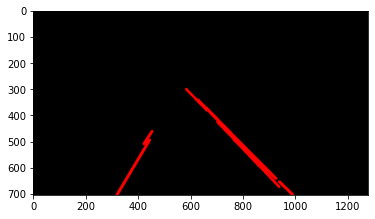

In [14]:
line_image = display_lines(lane_image,lines)
plt.imshow(line_image)

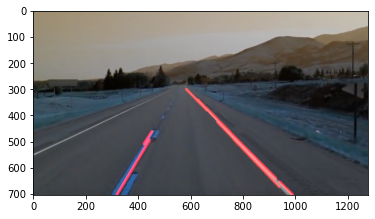

In [15]:
combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)
plt.imshow(combo_image)

In [34]:
def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1, y1, x2, y2])

def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        slope, intercept = np.polyfit((x1,x2),(y1,y2), 1)
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
    left_fit_average = np.average(left_fit, axis = 0)
    right_fit_average = np.average(right_fit, axis = 0)
    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)
    return np.array([left_line, right_line])

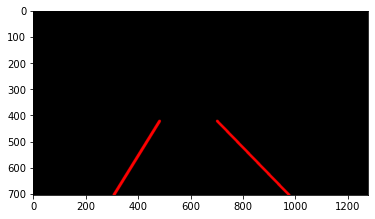

In [40]:
average_line = average_slope_intercept(image, lines)
average_line_image = display_lines(lane_image,average_line)
plt.imshow(average_line_image)

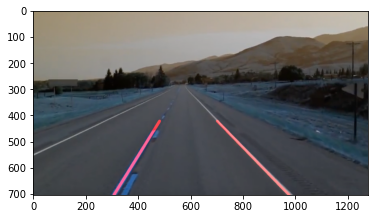

In [41]:
combo_image = cv2.addWeighted(image, 0.8, average_line_image, 1, 1)
plt.imshow(combo_image)

(704, 1279, 3)